In [ ]:
pip install -U ydata-profiling


In [ ]:

#Importing libraries
import pandas as pd
from pandas_profiling import ProfileReport



<ipython-input-2-e4abd5b013bc>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
pip install streamlit


In [ ]:
pip install streamlit-pandas-profiling


In [ ]:

#Visual libraries
import plotly.express as px
# from dash import Dash, dcc, html, Input, Output
# from plotly.offline import plot
import plotly.graph_objects as go

#Dashboard and Report libraries
import streamlit as st
import streamlit.components.v1 as components
from streamlit_pandas_profiling import st_profile_report

In [ ]:
st.markdown("# Assignment-1")
st.sidebar.header("Assignment-1")

def get_data():
    global transaction
    global CustomerDemographic
    global CustomerAddress
    global NewCustomerList

    tran_url=('https://docs.google.com/spreadsheets/d/1i1K42EZurcdozq0wc2JgR0RbqM470dLQ/edit#gid=1362789858')
    newcust_url='https://docs.google.com/spreadsheets/d/1i1K42EZurcdozq0wc2JgR0RbqM470dLQ/edit#gid=1123351247'
    cust_demo_url='https://docs.google.com/spreadsheets/d/1i1K42EZurcdozq0wc2JgR0RbqM470dLQ/edit#gid=2032610074'
    cust_Addr_url='https://docs.google.com/spreadsheets/d/1i1K42EZurcdozq0wc2JgR0RbqM470dLQ/edit#gid=1901353749'

    tran_xlsx_export_url = tran_url.replace('/edit#gid=', '/export?format=xlsx&gid=')
    newcust_xlsx_export_url = newcust_url.replace('/edit#gid=', '/export?format=xlsx&gid=')
    custdemo_xlsx_export_url = cust_demo_url.replace('/edit#gid=', '/export?format=xlsx&gid=')
    custaddr_xlsx_export_url = cust_Addr_url.replace('/edit#gid=', '/export?format=xlsx&gid=')

    transaction=pd.read_excel(tran_xlsx_export_url)
    CustomerDemographic=pd.read_excel(custdemo_xlsx_export_url)
    CustomerAddress=pd.read_excel(custaddr_xlsx_export_url)
    NewCustomerList=pd.read_excel(newcust_xlsx_export_url)



  command:

    streamlit run /usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2023-02-10 23:03:53.944 
  command:

    streamlit run /usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py [ARGUMENTS]


In [ ]:
pip install ydata_quality

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import datetime
from ydata_quality import DataQuality 
from ydata_quality.bias_fairness import BiasFairness


In [ ]:

#Visual libraries
import plotly.express as px
# from dash import Dash, dcc, html, Input, Output
# from plotly.offline import plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#Dashboard and Report libraries
import streamlit as st

In [ ]:
#Main Calling
transcaction=pd.read_excel(r"/content/KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="Transactions")
CustomerDemographic=pd.read_excel(r"/content/KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerDemographic")
CustomerAddress=pd.read_excel(r"/content/KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerAddress")
NewCustomerList=pd.read_excel(r"/content/KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="NewCustomerList")


<ipython-input-17-0a51ca17d4e6>:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  CustomerDemographic=pd.read_excel(r"/content/KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="CustomerDemographic")


In [ ]:
#reset the customer row names to proper values
def reset_df_header(df):
    df.columns=df.loc[0]
    df=df.drop(index=0,inplace=True)
    
reset_df_header(transcaction)
reset_df_header(CustomerAddress)
reset_df_header(NewCustomerList)

In [ ]:
NewCustomerList = NewCustomerList.loc[:, NewCustomerList.columns.notna()]


In [ ]:
NewCustomerList


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374
997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357
998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357
999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357


EDA for New Customer List

How successful was the previous marketing campaign, what typr of clients did we attract most?
What is the new customer's demographic
Check for high value customers

In [ ]:
#Finding gender demograph industry wise for new acquired customers
NewCustGender=NewCustomerList[['first_name','gender','job_industry_category']].groupby(['gender','job_industry_category']).count().reset_index()
NewCustGender.rename(columns={"first_name":"Count"},inplace=True)
NewCustGender['new_female_count']=NewCustGender['Count'][NewCustGender['gender']=='Female']
NewCustGender['new_male_count']=NewCustGender['Count'][NewCustGender['gender']=='Male']
NewCustGender['new_unknown_count']=NewCustGender['Count'][NewCustGender['gender']=='U']
NewCustGender.drop(columns=['gender','Count'],inplace=True)
NewCustGender=NewCustGender.groupby('job_industry_category').sum().reset_index()

#Finding gender demograph industry wise for new acquired customers
OldCustomerDemographic=CustomerDemographic[['name','gender','job_industry_category']].groupby(['gender','job_industry_category']).count().reset_index()
OldCustomerDemographic.rename(columns={"name":"Count"},inplace=True)
OldCustomerDemographic['old_female_count']=OldCustomerDemographic['Count'][OldCustomerDemographic['gender']=='Female']
OldCustomerDemographic['old_male_count']=OldCustomerDemographic['Count'][OldCustomerDemographic['gender']=='Male']
OldCustomerDemographic['old_unknown_count']=OldCustomerDemographic['Count'][OldCustomerDemographic['gender']=='U']
OldCustomerDemographic.drop(columns=['gender','Count'],inplace=True)
OldCustomerDemographic=OldCustomerDemographic.groupby('job_industry_category').sum().reset_index()
OldCustomerDemographic.rename(columns={"job_industry_category":"old_job_industry_category"},inplace=True)

#Merged File
merged_customer_demo=pd.concat([NewCustGender,OldCustomerDemographic],axis='columns') #,how='inner',on=['job_industry_category'])
merged_customer_demo.drop(columns=['old_job_industry_category'],inplace=True)
merged_customer_demo

,job_industry_category,new_female_count,new_male_count,new_unknown_count,old_female_count,old_male_count,old_unknown_count
0,Argiculture,10.0,16.0,0.0,57.0,56.0,0.0
1,Entertainment,20.0,16.0,1.0,67.0,69.0,0.0
2,Financial Services,110.0,92.0,1.0,392.0,375.0,7.0
3,Health,81.0,71.0,0.0,303.0,293.0,6.0
4,IT,18.0,18.0,15.0,79.0,72.0,72.0
5,Manufacturing,97.0,102.0,0.0,425.0,371.0,3.0
6,Property,35.0,29.0,0.0,144.0,123.0,0.0
7,Retail,44.0,34.0,0.0,184.0,174.0,0.0
8,Telecommunications,13.0,12.0,0.0,39.0,33.0,0.0


In [ ]:
def get_female_marketing_effectiveness(new,old):
    if new==0 and old==0:
        return 0
    else:
        sum=new+old
        return round(100*float(new/sum),2)
    

In [ ]:
merged_customer_demo['f_effective%']=merged_customer_demo.apply(lambda x: get_female_marketing_effectiveness(x['new_female_count'],x['old_female_count']),axis=1)
merged_customer_demo['m_effective%']=merged_customer_demo.apply(lambda x: get_female_marketing_effectiveness(x['new_male_count'],x['old_male_count']),axis=1)
merged_customer_demo['u_effective%']=merged_customer_demo.apply(lambda x: get_female_marketing_effectiveness(x['new_unknown_count'],x['old_unknown_count']),axis=1)



In [ ]:
merged_customer_demo


,job_industry_category,new_female_count,new_male_count,new_unknown_count,old_female_count,old_male_count,old_unknown_count,f_effective%,m_effective%,u_effective%
0,Argiculture,10.0,16.0,0.0,57.0,56.0,0.0,14.93,22.22,0.00
1,Entertainment,20.0,16.0,1.0,67.0,69.0,0.0,22.99,18.82,100.00
2,Financial Services,110.0,92.0,1.0,392.0,375.0,7.0,21.91,19.70,12.50
3,Health,81.0,71.0,0.0,303.0,293.0,6.0,21.09,19.51,0.00
4,IT,18.0,18.0,15.0,79.0,72.0,72.0,18.56,20.00,17.24
5,Manufacturing,97.0,102.0,0.0,425.0,371.0,3.0,18.58,21.56,0.00
6,Property,35.0,29.0,0.0,144.0,123.0,0.0,19.55,19.08,0.00
7,Retail,44.0,34.0,0.0,184.0,174.0,0.0,19.30,16.35,0.00
8,Telecommunications,13.0,12.0,0.0,39.0,33.0,0.0,25.00,26.67,0.00


In [ ]:
fig1 = go.Figure()
fig1.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo.new_female_count,orientation='h',marker_color='rgb(115,190,115)',name='New Female Customers'))
fig1.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo.old_female_count,orientation='h',marker_color='crimson',name='Old Female Customers'))
fig1.update_layout(template='plotly_dark')
fig1.show()

fig2=go.Figure()
fig2.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo.new_male_count,orientation='h',marker_color='rgb(27,79,114)',name='New Male Customers'))
fig2.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo.old_male_count,orientation='h',marker_color='crimson',name='Old Male Customers'))
fig2.update_layout(template='plotly_dark')
fig2.show()

fig3=go.Figure()
fig3.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo.new_unknown_count,orientation='h',marker_color='rgb(255, 220, 172)',name='New Unknow Customers'))
fig3.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo.old_unknown_count,orientation='h',marker_color='crimson',name='Old Unknow Customers'))
fig3.update_layout(template='plotly_dark')
fig3.show()

fig4=go.Figure()
fig4.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo['f_effective%'],orientation='h',name='Female'))
fig4.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo['m_effective%'],orientation='h',name='Male'))
fig4.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo['u_effective%'],orientation='h',name='Unknown'))
fig4.update_layout(template='plotly_dark')
fig4.show()

In [ ]:
#How different is our current customer base different from the new acquired customer base, which will 
#help us indicate which category of consumers we can cater the need's to.

fig = go.Figure()
fig.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo.new_female_count,orientation='h',marker_color='rgb(144,238,144)',name='New Female Customers'))
fig.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo.old_female_count,orientation='h',marker_color='crimson',name='Old Female Customers'))

Finding the spending cycle

Since the transactions are only for the year 2017 we will summarize the montly purchases for each month.
We will also find the most profitable month for the year 2017.
Since the profits have a wide range we create two section, one for above average and the other for below average profit values
We need to find the most profitable and least profitable values per season

In [ ]:
#finding the profits for each transaction
transcaction.transaction_date=pd.to_datetime(transcaction.transaction_date)
transcaction['month']=pd.DatetimeIndex(transcaction.transaction_date).month_name()
transcaction.list_price=transcaction.list_price.astype('float')
transcaction.standard_cost=transcaction.standard_cost.astype('float')
transcaction['profit(K)']=(transcaction.list_price-transcaction.standard_cost)/1000

#merging with customer demographic for further exploration
cust_expense=pd.merge(transcaction,CustomerDemographic,how='outer',on=['customer_id'])
cust_expense

#gouping by each month, customer type and product type
profits=cust_expense.groupby(['month','wealth_segment','product_size'])['profit(K)'].sum().reset_index()
profits=profits.round(2)

profits['above_avg']=profits['profit(K)'].apply(lambda x: x if x>profits['profit(K)'].mean() else 0)
profits['below_avg']=profits['profit(K)'].apply(lambda x: x if x<profits['profit(K)'].mean() else 0)
profits

,month,wealth_segment,product_size,profit(K),above_avg,below_avg
0,April,Affluent Customer,large,77.77,0.00,77.77
1,April,Affluent Customer,medium,155.27,155.27,0.00
2,April,Affluent Customer,small,7.37,0.00,7.37
3,April,High Net Worth,large,70.20,0.00,70.20
4,April,High Net Worth,medium,140.95,140.95,0.00
...,...,...,...,...,...,...
103,September,High Net Worth,medium,144.34,144.34,0.00
104,September,High Net Worth,small,8.52,0.00,8.52
105,September,Mass Customer,large,156.69,156.69,0.00
106,September,Mass Customer,medium,265.08,265.08,0.00


In [256]:

#Checking object attributes for accuracy i.e. check unique values and NaNs --- [transactions table]



#for each of the attributes, check for correct values (accuracy)

#checking order_status
unique_values_OS = transcaction["order_status"].unique()
print("unique values -- order status ---", unique_values_OS)

#checking brand
unique_values_brand = transcaction["brand"].unique()
print("unique values -- brand ---", unique_values_brand)

#checking NaN count in brand
nan_count_brand = transcaction["brand"].isna().sum()
print("missing values in the brand column:", nan_count_brand)

#checking product_line
unique_values_PL = transcaction["product_line"].unique()
print("unique values -- product line ---", unique_values_PL)

#checking NaN count in product_line
nan_count_pl = transcaction["product_line"].isna().sum()
print("missing values in the product_line column:", nan_count_pl)

#checking product_class
unique_values_pc = transcaction["product_class"].unique()
print("unique values -- product_class ---", unique_values_pc)

#checking NaN count in product_class
nan_count_pc = transcaction["product_class"].isna().sum()
print("missing values in the product_class column:", nan_count_pc)

#checking product_size
unique_values_ps = transcaction["product_size"].unique()
print("unique values -- product_size ---", unique_values_ps)

#checking NaN count in product_size
nan_count_ps = transcaction["product_size"].isna().sum()
print("missing values in the product_size column:", nan_count_ps)





unique values -- order status --- ['Approved' 'Cancelled']
unique values -- brand --- ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
missing values in the brand column: 197
unique values -- product line --- ['Standard' 'Road' 'Mountain' 'Touring' nan]
missing values in the product_line column: 197
unique values -- product_class --- ['medium' 'low' 'high' nan]
missing values in the product_class column: 197
unique values -- product_size --- ['medium' 'large' 'small' nan]
missing values in the product_size column: 197


In [257]:

# instances where values in the order_status column == §approved§ and other details like class and size are NaN -- probable invalid transactions
inv_trans = transcaction[(transcaction["order_status"] == "Approved") & (transcaction["product_size"].isna()) & (transcaction["product_class"].isna()) & (transcaction["product_line"].isna()) & (transcaction["brand"].isna())][:15]

#Get the count
count = inv_trans.shape[0]
print("Number of transactions with order status approved and product details not available :", count)


Number of transactions with order status approved and product details not available : 15


In [258]:
probable_invalid_transactions = inv_trans[["customer_id", "product_id", "transaction_id"]]

# Print the columns
print(probable_invalid_transactions)

0    customer_id product_id transaction_id
137          431          0            137
160         3300          0            160
367         1614          0            367
407         2559          0            407
677         2609          0            677
781          897          0            781
1131        2163          0           1131
1197        2234          0           1197
1283         397          0           1283
1654        1972          0           1654
1681        2733          0           1681
1753         925          0           1753
1779        2153          0           1779
2187        1568          0           2187
2303        2465          0           2303


In [259]:

# instances where values in the order_status column == §Cancelled§ -- cancelled transactions 
cancelled_trans = transcaction[(transcaction["order_status"] == "Cancelled") & (transcaction["product_size"].isna()) & (transcaction["product_class"].isna()) & (transcaction["product_line"].isna()) & (transcaction["brand"].isna())][:15]


#Get the count
count_ct = cancelled_trans.shape[0]
print("Number of transactions with order status cancelled and product details not available :", count_ct)


Number of transactions with order status cancelled and product details not available : 1


**CUST_DEMOGRAPHICS TABLE EDA**


In [261]:

# Merge
merged_df = CustomerDemographic.merge(inv_trans[['customer_id']], on='customer_id', how='inner')

# Get the desired columns
referenced = merged_df[['name', 'customer_id', 'DOB','deceased_indicator']]

# Print the ids that could be referenced back to cust_dem table
print(referenced)
print("Result count:", referenced.shape[0])

                   name customer_id        DOB deceased_indicator
0             Gale Done         431 1956-03-26                  N
1   Quintus Gouldthorpe        3300 1961-05-22                  N
2        Genvieve Kobes        2609 1964-12-18                  N
3            Pris Fance         897 1969-01-11                  N
4        Fulvia Bernini        2559 1969-06-21                  N
5       Nicko Pembridge         925 1978-08-07                  N
6       Bellanca Strutz        1568 1980-05-23                  N
7         Nerissa Foote         397 1981-09-02                  N
8         Currie Gimber        1614 1984-08-12                  N
9         Paloma Nilles        2465 1984-06-12                  N
10       Jordanna Skyme        2733 1985-03-07                  N
11               Jimmy         2153 1986-10-13                  N
12         Dylan Hanvey        2234 1986-09-09                  N
13          Obed Pauler        1972 1989-07-14                  N
14        

In [264]:
# Find the count of customer IDs in Table 1 that are not present in Table 2 -- checking for possible fraud

not_present = inv_trans[~inv_trans["customer_id"].isin(CustomerDemographic["customer_id"])].shape[0]
print("Count of customer IDs in invalid_transactions that could not be referenced in demographic_cust:", not_present)

#Order mismanagement rate 

row_count = transcaction.shape[0]
print("Number of rows in the DataFrame:", row_count)
 
referenced.shape[0]/row_count

Count of customer IDs in invalid_transactions that could not be referenced in demographic_cust: 0
Number of rows in the DataFrame: 20000


0.00075

In [279]:
#wealth_segment
unique_values_ws = CustomerDemographic["wealth_segment"].unique()
print("unique values -- wealth_segment ---", unique_values_ws)

print("-----------------------------------------")

counts = CustomerDemographic['wealth_segment'].value_counts()
print(counts)

unique values -- wealth_segment --- ['Affluent Customer' 'Mass Customer' 'High Net Worth']
-----------------------------------------
Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64


In [281]:
#AGE 

print("-----------------------------------------")


CustomerDemographic['age_range'] = pd.cut(CustomerDemographic['age'], bins=[0, 25, 50, 75, 100], labels=['0-25', '25-50', '50-75', '75-100'])
age_range_counts = CustomerDemographic.groupby(['age_range'])['age_range'].count()
print(age_range_counts)


print("-----------------------------------------")

-----------------------------------------
age_range
0-25       501
25-50     2337
50-75     1069
75-100       5
Name: age_range, dtype: int64
-----------------------------------------


#DQA

In [220]:
 dq = DataQuality(df=profits)
results = dq.evaluate()

Warnings:
	TOTAL: 1 warning(s)
	Priority 2: 1 warning(s)


Priority 2 - usage allowed, limited human intelligibility:
	* [DATA RELATIONS - HIGH COLLINEARITY - NUMERICAL] Found 3 numerical variables with high Variance Inflation Factor (VIF>5.0). The variables listed in results are highly collinear with other variables in the dataset. These will make model explainability harder and potentially give way to issues like overfitting.Depending on your end goal you might want to remove the highest VIF variables.



In [ ]:
dq.get_warnings(test="High Collinearity - Numerical")


[QualityWarning(category='Data Relations', test='High Collinearity - Numerical', description='Found 3 numerical variables with high Variance Inflation Factor (VIF>5.0). The variables listed in results are highly collinear with other variables in the dataset. These will make model explainability harder and potentially give way to issues like overfitting.Depending on your end goal you might want to remove the highest VIF variables.', priority=<Priority.P2: 2>, data=profit(K)    inf
 above_avg    inf
 below_avg    inf
 dtype: float64)]

In [208]:
dq = BiasFairness(df=profits,sensitive_features=['wealth_segment', 'month'], label='profit(K)') # create the main class that holds all quality modules
results = dq.evaluate()
print(results)

print(dq.get_warnings(test='Proxy Identification'))

print('\n Lowering the threshold \n')

dq.proxy_identification(th=0.45)

print('\n Sensitive Attribute Predictability \n')
dq.get_warnings(test='Sensitive Attribute Predictability')

WARNING | Skipping performance_discrimination due to failure during computation.                         See results folder of this test for further details.
No warnings found.
{'performance_discrimination': '[ERROR] Test failed to compute. Original exception: continuous target data is not supported with label binarization', 'proxy_identification': Series([], Name: association, dtype: float64), 'sensitive_predictability': wealth_segment     0.33545
month             0.031403
dtype: object, 'sensitive_representativity': {'month': April        0.083333
August       0.083333
December     0.083333
February     0.083333
January      0.083333
July         0.083333
June         0.083333
March        0.083333
May          0.083333
November     0.083333
October      0.083333
September    0.083333
Name: month, dtype: float64, 'wealth_segment': Affluent Customer    0.333333
High Net Worth       0.333333
Mass Customer        0.333333
Name: wealth_segment, dtype: float64}}
[]

 Lowering the thresho

[]

In [ ]:
dq = BiasFairness(df=profits,sensitive_features=['wealth_segment', 'product_size'], label='profit(K)') # create the main class that holds all quality modules
results = dq.evaluate()

print(dq.get_warnings(test='Proxy Identification'))

print('\n Lowering the threshold \n')

dq.proxy_identification(th=0.45)

print('\n Sensitive Attribute Predictability \n')
dq.get_warnings(test='Sensitive Attribute Predictability')

WARNING | Skipping performance_discrimination due to failure during computation.                         See results folder of this test for further details.
Warnings:
	TOTAL: 2 warning(s)
	Priority 2: 1 warning(s)
	Priority 3: 1 warning(s)


Priority 2 - usage allowed, limited human intelligibility:
	* [BIAS&FAIRNESS - PROXY IDENTIFICATION] Found 3 feature pairs of correlation to sensitive attributes with values higher than defined threshold (0.5).
Priority 3 - minor impact, aesthetic:
	* [BIAS&FAIRNESS - SENSITIVE ATTRIBUTE PREDICTABILITY] Found 1 sensitive attribute(s) with high predictability performance (greater than 0.5).
[QualityWarning(category='Bias&Fairness', test='Proxy Identification', description='Found 3 feature pairs of correlation to sensitive attributes with values higher than defined threshold (0.5).', priority=<Priority.P2: 2>, data=features
product_size_profit(K)    0.849740
above_avg_product_size    0.813517
below_avg_product_size    0.712490
Name: association, dty

[QualityWarning(category='Bias&Fairness', test='Sensitive Attribute Predictability', description='Found 1 sensitive attribute(s) with high predictability performance (greater than 0.5).', priority=<Priority.P3: 3>, data=product_size    0.774746
 dtype: object)]

In [ ]:
dq.get_warnings(test='Proxy Identification')


[QualityWarning(category='Bias&Fairness', test='Proxy Identification', description='Found 4 feature pairs of correlation to sensitive attributes with values higher than defined threshold (0.45).', priority=<Priority.P2: 2>, data=features
 product_size_profit(K)      0.849740
 above_avg_product_size      0.813517
 below_avg_product_size      0.712490
 above_avg_wealth_segment    0.469224
 Name: association, dtype: float64),
 QualityWarning(category='Bias&Fairness', test='Proxy Identification', description='Found 3 feature pairs of correlation to sensitive attributes with values higher than defined threshold (0.5).', priority=<Priority.P2: 2>, data=features
 product_size_profit(K)    0.849740
 above_avg_product_size    0.813517
 below_avg_product_size    0.712490
 Name: association, dtype: float64)]

In [219]:
dq = BiasFairness(df=profits,sensitive_features=['product_size', 'month'], label='profit(K)') # create the main class that holds all quality modules
results = dq.evaluate()

print(dq.get_warnings(test='Proxy Identification'))

print('\n Lowering the threshold \n')

dq.proxy_identification(th=0.45)

print('\n Sensitive Attribute Predictability \n')
dq.get_warnings(test='Sensitive Attribute Predictability')

WARNING | Skipping performance_discrimination due to failure during computation.                         See results folder of this test for further details.
Warnings:
	TOTAL: 2 warning(s)
	Priority 2: 1 warning(s)
	Priority 3: 1 warning(s)


Priority 2 - usage allowed, limited human intelligibility:
	* [BIAS&FAIRNESS - PROXY IDENTIFICATION] Found 3 feature pairs of correlation to sensitive attributes with values higher than defined threshold (0.5).
Priority 3 - minor impact, aesthetic:
	* [BIAS&FAIRNESS - SENSITIVE ATTRIBUTE PREDICTABILITY] Found 1 sensitive attribute(s) with high predictability performance (greater than 0.5).
[QualityWarning(category='Bias&Fairness', test='Proxy Identification', description='Found 3 feature pairs of correlation to sensitive attributes with values higher than defined threshold (0.5).', priority=<Priority.P2: 2>, data=features
product_size_profit(K)    0.849740
above_avg_product_size    0.813517
below_avg_product_size    0.712490
Name: association, dty

[QualityWarning(category='Bias&Fairness', test='Sensitive Attribute Predictability', description='Found 1 sensitive attribute(s) with high predictability performance (greater than 0.5).', priority=<Priority.P3: 3>, data=product_size    0.774746
 dtype: object)]

In [ ]:
monthly_profit=profits.groupby(['month','wealth_segment','product_size'])['above_avg'].sum().reset_index()
sorteded=monthly_profit.sort_values(by=['above_avg'],ascending=False)
sorteded

,month,wealth_segment,product_size,above_avg
97,October,Mass Customer,medium,2.475338
52,July,Mass Customer,medium,2.368218
16,August,Mass Customer,medium,2.252742
7,April,Mass Customer,medium,2.123574
34,February,Mass Customer,medium,2.122165
...,...,...,...,...
44,January,Mass Customer,small,-0.812655
41,January,High Net Worth,small,-0.812655
39,January,High Net Worth,large,-0.812655
38,January,Affluent Customer,small,-0.812655


In [ ]:
fig = px.sunburst(profits,
                  path=['month'],values='profit(K)',color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text="<b>Profit for each month by each wealth segment and for product size<b>", 
                  titlefont={'size': 20, 'family':'calibri'},
                  width=800, 
                  height=800,
                  
                 )
fig.show()

In [ ]:
cust_expense


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,2,2950.0,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,Male,19.0,1955-01-11,65.0,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
1,11065,1,2950.0,2017-10-16,False,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19.0,1955-01-11,65.0,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
2,18923,62,2950.0,2017-04-26,False,Approved,Solex,Standard,medium,medium,...,Male,19.0,1955-01-11,65.0,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
3,2,3,3120.0,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,Female,89.0,1979-02-04,41.0,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
4,6862,4,3120.0,2017-10-05,False,Approved,Giant Bicycles,Standard,high,medium,...,Female,89.0,1979-02-04,41.0,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20502,NaN,NaN,3607.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,Male,99.0,2001-05-22,19.0,Clinical Specialist,Health,Mass Customer,N,No,1.0
20503,NaN,NaN,3616.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,Male,42.0,2001-04-02,19.0,Product Engineer,Property,High Net Worth,N,No,2.0
20504,NaN,NaN,3749.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,3.0,2001-04-21,19.0,NaN,IT,Affluent Customer,N,No,1.0
20505,NaN,NaN,3949.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,Male,24.0,2001-12-19,18.0,Web Designer IV,Manufacturing,High Net Worth,N,Yes,1.0


In [ ]:
fig = px.sunburst(profits,
                  path=['month', 'wealth_segment', 'product_size'],values='above_avg',color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text="<b>Profit for each month by each wealth segment and for product size<b>", 
                  titlefont={'size': 20, 'family':'calibri'},
                  width=800, 
                  height=800,
                  
                 )
fig.show()

In [ ]:
fig = px.sunburst(profits,
                  path=['month', 'wealth_segment', 'product_size'],values='below_avg',color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text="<b>Profit for each month by each wealth segment and for product size<b>", 
                  titlefont={'size': 20, 'family':'calibri'},
                  width=800, 
                  height=800,
                 )
fig.show()

In [ ]:
# from pandas.tseries.holiday import USFederalHolidayCalendar as uscalendar
# transcaction['week']=transcaction.transaction_date.dt.isocalendar().week
# transcaction

# def us_holiday_week_range(df: pd.DataFrame, max_day_delay=5) -> pd.DataFrame:
#     """Generates a list of Federal US holidays, duplicated forward `max_day_delay` times.
#     A holiday happening on a Monday will be duplicated until that week's Friday if the delay is set to 5.
#     """
#     cal = uscalendar()
#     holidays = pd.Series(cal.holidays(start=df['transaction_date'].min(), end=df['transaction_date'].max()))
#     holiday_range = pd.concat(
#         [holidays, *[holidays + pd.Timedelta(i, 'd') for i in range(1, max_day_delay + 1)]]
#     )
#     df['us_holiday_week'] = df['transaction_date'].isin(holiday_range)
#     return df

# us_holiday_week_range(transcaction)

In [ ]:
transcaction


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,month,profit(K)
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,February,0.01787
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701,May,1.70255
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,October,1.54461
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145,August,0.81736
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226,October,1.05582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823,June,0.80226
19997,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560,November,0.10424
19998,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410,April,1.59219
19999,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216,July,0.09115


In [ ]:
############# #############
############# #############
############# #############

OldCustomerDemographic

,old_job_industry_category,old_female_count,old_male_count,old_unknown_count
0,Agriculture,57.0,56.0,0.0
1,Entertainment,67.0,69.0,0.0
2,Financial Services,392.0,375.0,7.0
3,Health,303.0,293.0,6.0
4,IT,79.0,72.0,72.0
5,Manufacturing,425.0,371.0,3.0
6,Property,144.0,123.0,0.0
7,Retail,184.0,174.0,0.0
8,Telecommunications,39.0,33.0,0.0


In [ ]:
#QualityAnalysis---cont: DataExpectationsReporter() for Profits Table

import pandas as pd

from ydata_quality.data_expectations import DataExpectationsReporter

##No validation data for running DataExpectationsReporter() engine


In [ ]:
#QualityAnalysis---cont: DataRelationDetectors() for Profits Table


In [ ]:
pip uninstall matplotlib

In [ ]:
pip install matplotlib==3.1.3


quality analysis check -- :DataExpectationsReporter() and DataRelationDetectors() -- 

WARNING | Property 'dtypes' should be a dictionary. Defaulting to all column dtypes inference.


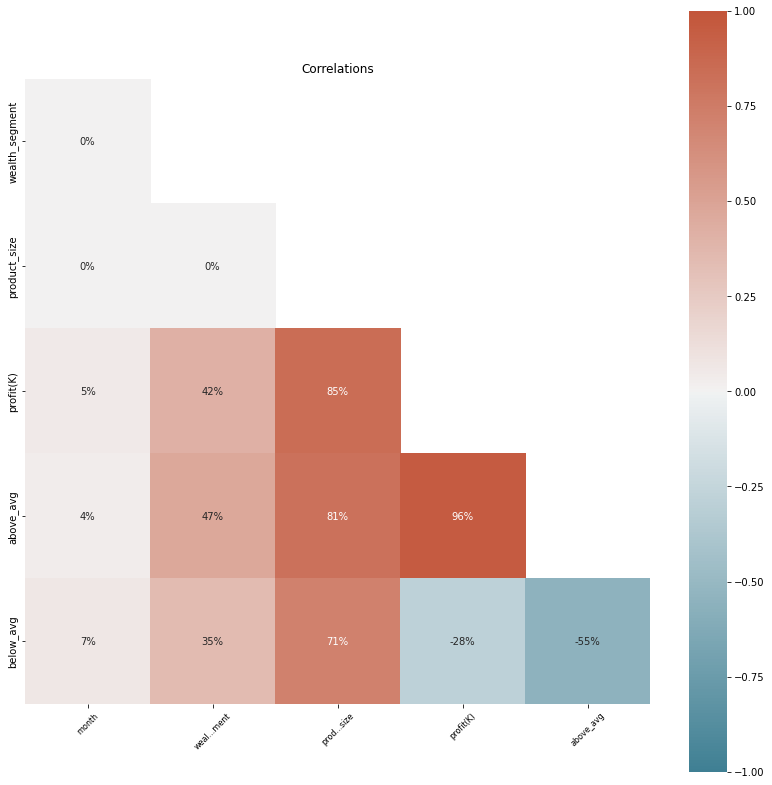

WARNING | The partial correlation matrix is not computable for this dataset. Skipping potential confounder and collider detection tests.
Warnings:
	TOTAL: 1 warning(s)
	Priority 2: 1 warning(s)


Priority 2 - usage allowed, limited human intelligibility:
	* [DATA RELATIONS - HIGH COLLINEARITY - NUMERICAL] Found 3 numerical variables with high Variance Inflation Factor (VIF>5.0). The variables listed in results are highly collinear with other variables in the dataset. These will make model explainability harder and potentially give way to issues like overfitting.Depending on your end goal you might want to remove the highest VIF variables.



{'Correlations': {'Correlation matrix':                    month  wealth_segment  product_size  profit(K)  above_avg  \
  month           1.000000        0.000000      0.000000   0.050266   0.036875   
  wealth_segment  0.000000        1.000000      0.000000   0.417818   0.469224   
  product_size    0.000000        0.000000      1.000000   0.849740   0.813517   
  profit(K)       0.050266        0.417818      0.849740   1.000000   0.956428   
  above_avg       0.036875        0.469224      0.813517   0.956428   1.000000   
  below_avg       0.067050        0.346863      0.712490  -0.282840  -0.550562   
  
                  below_avg  
  month            0.067050  
  wealth_segment   0.346863  
  product_size     0.712490  
  profit(K)       -0.282840  
  above_avg       -0.550562  
  below_avg        1.000000  , 'Partial correlation matrix': None},
 'High Collinearity': {'Numerical': profit(K)    inf
  above_avg    inf
  below_avg    inf
  dtype: float64, 'Categorical': []}}

In [ ]:
#####QualityAnalysis---cont: DataExpectationsReporter() for Profits Table

import pandas as pd

from ydata_quality.data_expectations import DataExpectationsReporter

##No validation data for running DataExpectationsReporter() engine

#####QualityAnalysis---cont: DataRelationDetectors() for Profits Table

drd = DataRelationsDetector()
results = drd.evaluate(profits, dtypes=None, label=None, corr_th=0.8, vif_th=5)

results

In [ ]:
warnings = drd.get_warnings()
warnings

[QualityWarning(category='Data Relations', test='High Collinearity - Numerical', description='Found 3 numerical variables with high Variance Inflation Factor (VIF>5.0). The variables listed in results are highly collinear with other variables in the dataset. These will make model explainability harder and potentially give way to issues like overfitting.Depending on your end goal you might want to remove the highest VIF variables.', priority=<Priority.P2: 2>, data=profit(K)    inf
 above_avg    inf
 below_avg    inf
 dtype: float64)]

In [133]:
profits

,month,wealth_segment,product_size,profit(K),above_avg,below_avg
0,April,Affluent Customer,large,-0.271067,-0.812655,1.894685
1,April,Affluent Customer,medium,0.625421,0.750549,-0.677485
2,April,Affluent Customer,small,-1.085425,-0.812655,-0.433730
3,April,High Net Worth,large,-0.358634,-0.812655,1.644314
4,April,High Net Worth,medium,0.459773,0.606380,-0.677485
...,...,...,...,...,...,...
103,September,High Net Worth,medium,0.498987,0.640509,-0.677485
104,September,High Net Worth,small,-1.072122,-0.812655,-0.395694
105,September,Mass Customer,large,0.641847,0.764845,-0.677485
106,September,Mass Customer,medium,1.895657,1.856077,-0.677485


**quality analysis check -- :DriftAnalysis() -- NOT RELEVANT - NO VALIDATION DS for drift** **analysis**





In [125]:
#quality analysis check -- :DuplicatesCheck() -- for Profits table


import pandas as pd
from ydata_quality.duplicates import DuplicateChecker

In [141]:
dc = DuplicateChecker(df=profits, entities=['product_size', 'profit(K)'])
results = dc.evaluate()
results.keys()

INFO | No exact duplicates were found.
INFO | No duplicate columns were found.
No warnings found.


dict_keys(['exact_duplicates', 'entity_duplicates', 'duplicate_columns'])

In [142]:
# Retrieve the warnings
warnings = dc.get_warnings()
warnings

[]

In [143]:
#Exact duplicate check 
exact_duplicates_out = dc.exact_duplicates()
exact_duplicates_out.head()

INFO | No exact duplicates were found.


AttributeError: ignored

QUALITY ANALYSIS -- Profits df -- Labelling: Categoricals and Numericals ---- ??

In [145]:
profits

,month,wealth_segment,product_size,profit(K),above_avg,below_avg
0,April,Affluent Customer,large,-0.271067,-0.812655,1.894685
1,April,Affluent Customer,medium,0.625421,0.750549,-0.677485
2,April,Affluent Customer,small,-1.085425,-0.812655,-0.433730
3,April,High Net Worth,large,-0.358634,-0.812655,1.644314
4,April,High Net Worth,medium,0.459773,0.606380,-0.677485
...,...,...,...,...,...,...
103,September,High Net Worth,medium,0.498987,0.640509,-0.677485
104,September,High Net Worth,small,-1.072122,-0.812655,-0.395694
105,September,Mass Customer,large,0.641847,0.764845,-0.677485
106,September,Mass Customer,medium,1.895657,1.856077,-0.677485


In [ ]:
pip install ydata_quality


In [168]:
# Update the imports
from ydata_quality.missings import MissingsProfiler


In [169]:
#create the engine
mp = MissingsProfiler(df=profits, random_state=42)


In [170]:
results = mp.evaluate()


No warnings found.


In [171]:
#NULL COUNT

mp.null_count()


Series([], dtype: int64)

In [173]:

mp.missing_correlations()


""


In [174]:
mp.high_missing_correlations(th=0.8)


Series([], Name: missings_corr, dtype: float64)

In [175]:
mp.predict_missings()


Series([], Name: predict_missings, dtype: object)

------MISSING CHECK : ALL CLEAR for profits df --------

ERRONEOUS DATA CHECK with ErroneousDataIdentifier()

In [177]:
import pandas as pd
import numpy as np
from ydata_quality.erroneous_data import ErroneousDataIdentifier

In [179]:
edv_extensions = ['Nan', 'NA', '' ,'UNKNOWN']
edi = ErroneousDataIdentifier(df=profits, ed_extensions=edv_extensions)  # Note we are passing our ED extensions her

In [180]:
results = edi.evaluate()


INFO | No predefined ED values from  the set {'', 'na', 'nan', 'unknown', 'n/a', '?', 'unk', '(blank)'} were found in the dataset.
No warnings found.


In [182]:
warnings = edi.get_warnings()
warnings

[]

In [189]:
cust_expense

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,2,2950.0,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,Male,19.0,1955-01-11,65.0,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
1,11065,1,2950.0,2017-10-16,False,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19.0,1955-01-11,65.0,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
2,18923,62,2950.0,2017-04-26,False,Approved,Solex,Standard,medium,medium,...,Male,19.0,1955-01-11,65.0,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0
3,2,3,3120.0,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,Female,89.0,1979-02-04,41.0,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
4,6862,4,3120.0,2017-10-05,False,Approved,Giant Bicycles,Standard,high,medium,...,Female,89.0,1979-02-04,41.0,Clinical Specialist,Health,Mass Customer,N,Yes,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20502,NaN,NaN,3607.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,Male,99.0,2001-05-22,19.0,Clinical Specialist,Health,Mass Customer,N,No,1.0
20503,NaN,NaN,3616.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,Male,42.0,2001-04-02,19.0,Product Engineer,Property,High Net Worth,N,No,2.0
20504,NaN,NaN,3749.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,Female,3.0,2001-04-21,19.0,NaN,IT,Affluent Customer,N,No,1.0
20505,NaN,NaN,3949.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,Male,24.0,2001-12-19,18.0,Web Designer IV,Manufacturing,High Net Worth,N,Yes,1.0


In [222]:
bf = BiasFairness(df=cust_expense, sensitive_features=['brand', 'gender'], label='product_size', random_state=42)


In [223]:
bf.get_warnings(test="High Collinearity - Numerical")


[]

In [224]:
results = bf.evaluate()


WARNING | Skipping performance_discrimination due to failure during computation.                         See results folder of this test for further details.
WARNING | Skipping proxy_identification due to failure during computation.                         See results folder of this test for further details.
WARNING | Skipping sensitive_predictability due to failure during computation.                         See results folder of this test for further details.
No warnings found.


In [225]:
bias_fairness_warnings = bf.get_warnings()
bias_fairness_warnings

[]

In [226]:
# Results object structure
list(results.keys())

['performance_discrimination',
 'proxy_identification',
 'sensitive_predictability',
 'sensitive_representativity']

In [233]:
bf.sensitive_representativity()


{'brand': Solex             0.214765
 Giant Bicycles    0.167247
 WeareA2B          0.166389
 OHM Cycles        0.153664
 Trek Bicycles     0.150987
 Norco Bicycles    0.146947
 Name: brand, dtype: float64, 'gender': Female    0.501853
 Male      0.475419
 U         0.022727
 Name: gender, dtype: float64}

In [237]:

##No validation data for running DataExpectationsReporter() engine


In [238]:
#DuplicateChecker() for Cust_expense

dc = DuplicateChecker(df=cust_expense, entities=['transaction_id',	'product_id',	'customer_id',	'transaction_date',	'online_order',	'order_status',	'brand',	'product_line',	'product_class',	'product_size',	'gender',	'past_3_years_bike_related_purchases',	'DOB',	'age',	'job_title',	'job_industry_category',	'wealth_segment',	'deceased_indicator', 'owns_car', 'tenure'])


In [239]:
results = dc.evaluate()
results.keys()

INFO | No exact duplicates were found.
INFO | No duplicate columns were found.
No warnings found.


dict_keys(['exact_duplicates', 'entity_duplicates', 'duplicate_columns'])

In [242]:
# Retrieve the warnings
warnings = dc.get_warnings()
warnings

[]

**NO ** exact_Duplicates, entity_duplicates, or duplicate_columns found in cust_expense table. 

MISSING DATA CHECK ON cust_expense table

In [246]:
#MissingProfiler()

mp = MissingsProfiler(df=cust_expense, random_state=42)


In [247]:
results = mp.evaluate()


No warnings found.


In [248]:
mp.null_count()


Series([], dtype: int64)

In [249]:
mp.nulls_higher_than(th=0.1)


In [250]:
mp.missing_correlations()


""


MISSING DATA ANALYZED FOR CUST_EXPENSE -- NO WARNINGS FOUND

In [253]:
##ERRONEOUS DATA CHECK

edv_extensions = ['NaN', 'NA', '', 'UNKNOWN']
edi = ErroneousDataIdentifier(df=cust_expense, ed_extensions=edv_extensions) 

In [254]:
results = edi.evaluate()


INFO | No predefined ED values from  the set {'', 'na', 'nan', 'unknown', 'n/a', '?', 'unk', '(blank)'} were found in the dataset.
No warnings found.


In [ ]:
 tab1,tab2,tab3,tab4=st.tabs(["Finding the spending cycle","Marketing Effectiveness","Lets talk profits","Our Inference"])
    with tab1:
        st.write('### Finding the spending cycle')

        st.write('-  Since the transactions are only for the year 2017 we will summarize the montly purchases for each month.')
        st.write('-  We will also find the most profitable month for the year 2017.') 
        st.write('-  Since the profits have a wide range we create two section, one for above average and the other for below average profit values')
        st.write('-  We need to find the most profitable and least profitable values per season')
        fig = px.sunburst(profits,
                          path=['month', 'wealth_segment', 'product_size'],values='above_avg',color_discrete_sequence=px.colors.qualitative.Pastel)
        fig.update_layout(width=800, 
                          height=800,
                         )

        st.plotly_chart(fig)
        st.markdown("<h3 style='text-align: center; color: black;'>Above Averge Monthly Spenders</h3>", unsafe_allow_html=True)
        
        fig = px.sunburst(profits,
                  path=['month', 'wealth_segment', 'product_size'],values='below_avg',color_discrete_sequence=px.colors.qualitative.Pastel)
        fig.update_layout(width=800, 
                          height=800,
                         )
        st.plotly_chart(fig)
        st.markdown("<h3 style='text-align: center; color: black;'>Below Averge Monthly Spenders</h3>", unsafe_allow_html=True)
    with tab2:
        st.write("### Sector of new customer acquired")
        fig1 = go.Figure()
        fig1.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo['f_effective%'],orientation='h',marker_color='rgb(115,190,115)',name='New Female Customers %'))
        fig1.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo.old_female_count,orientation='h',marker_color='crimson',name='Old Female Customers'))
        fig1.update_layout(template='plotly_dark')
        st.plotly_chart(fig1,theme="streamlit")
        
        fig2=go.Figure()
        fig2.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo['m_effective%'],orientation='h',marker_color='rgb(27,79,114)',name='New Male Customers %'))
        fig2.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo.old_male_count,orientation='h',marker_color='crimson',name='Old Male Customers'))
        fig2.update_layout(template='plotly_dark')
        st.plotly_chart(fig2)
        
        fig3=go.Figure()
        fig3.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo['u_effective%'],orientation='h',marker_color='rgb(255, 220, 172)',name='New Unknow Customers %'))
        fig3.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo.old_unknown_count,orientation='h',marker_color='crimson',name='Old Unknow Customers'))
        fig3.update_layout(template='plotly_dark')
        st.plotly_chart(fig3)
        
        fig4=go.Figure()
        fig4.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo['f_effective%'],orientation='h',name='Female'))
        fig4.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo['m_effective%'],orientation='h',name='Male'))
        fig4.add_trace(go.Bar(y=merged_customer_demo.job_industry_category, x=merged_customer_demo['u_effective%'],orientation='h',name='Unknown'))
        fig4.update_layout(template='plotly_dark')
        st.plotly_chart(fig4)
        
                
    with tab3:
        st.write('#### What are the numbers from on online and offline sales')
        st.write(transaction.groupby(['online_order'])['profit(K)'].sum())
        st.write('#### What are the numbers for different class of product')
        st.write(transaction.groupby(['online_order','product_class'])['profit(K)'].sum())
        st.write('#### What are the numbers for different line of product')
        st.write(transaction.groupby(['online_order','product_class','product_line'])['profit(K)'].sum())
        
        
    with tab4:
        st.write('#### Question to ask ourself')
        st.write('##### How successful was the previous marketing campaign, what type of clients did we attract most? ')
        st.write("""- Given we had more female clients in past, the marketing for that sector was not effective when compared with male customers""")
        st.write("""-  0% Acquisition in Telecomm., Retail, Manufacturing, Health, Agriculture sectors for Unknown gender 
                       demographic. Failed to create a market share. We even failed to acquire new customers in sector’s 
                       where we had presence such as Health.
                 """)
      
        st.write('#### How different is our current customer base different from the new acquired customer base, which will help us indicate which category of consumers we can cater the needs to.')
        st.write(""" -  20.43% of avg. new male customer's acquired per sector.""")
        st.write("""-  20.17% of avg. new female customer's acquired per sector.""")
        st.write("""-  When compared with old customers, where we have 1690 female and1566 male customers
                        we have successfully acquired more male customers ' 
                 """)  
        st.write('#### Where do we see the bussiness going with new customers acquired.')
        st.write("""- Entertainment, financial, health and retail saw increase in male client's""")
        st.write("""- Telecomm., manufacturing, IT and agriculture saw increase in female client's""")
        
        st.write("""- From the sunburst chart it is clear that across all month's medium category products
                 purchased by Mass customer's are the profitable with October being the profitable
                 with 326.59K in profits.""")
        st.write("""- But out of all large category is the most profitable, reason being that all 3 customer 
                     types have a tast for large category""")  
        st.write("""- Small category is the least profitable branch""")
        profit_expander = st.expander(label='Monthly Performance')
        with profit_expander:
            'Monthly performance'
            monthly_profit=profits.groupby(['month'])['profit(K)'].sum().reset_index()
            sorteded=monthly_profit.sort_values(by=['profit(K)'],ascending=False)
            sorteded
            monthly_profit=profits.groupby(['month','product_size'])['profit(K)'].sum().reset_index()
            sorteded=monthly_profit.sort_values(by=['profit(K)'],ascending=False)
            sorteded
            
        gainer_expander = st.expander(label='Gainers Performance')    
        with gainer_expander:
            'Top Gainers'
            monthly_profit=profits.groupby(['month'])['above_avg'].sum().reset_index()
            sorteded=monthly_profit.sort_values(by=['above_avg'],ascending=False)
            sorteded
            monthly_profit=profits.groupby(['month','product_size'])['above_avg'].sum().reset_index()
            sorteded=monthly_profit.sort_values(by=['above_avg'],ascending=False)
            sorteded
            monthly_profit=profits.groupby(['month','wealth_segment','product_size'])['above_avg'].sum().reset_index()
            sorteded=monthly_profit.sort_values(by=['above_avg'],ascending=False)
            sorteded
            
        loser_expander = st.expander(label='Losers Performance')    
        with loser_expander:
            'Top Losing'
            monthly_profit=profits.groupby(['month'])['below_avg'].sum().reset_index()
            sorteded=monthly_profit.sort_values(by=['below_avg'],ascending=True)
            sorteded
            monthly_profit=profits.groupby(['month','product_size'])['below_avg'].sum().reset_index()
            sorteded=monthly_profit.sort_values(by=['below_avg'],ascending=True)
            sorteded
            monthly_profit=profits.groupby(['month','wealth_segment','product_size'])['below_avg'].sum().reset_index()
            sorteded=monthly_profit.sort_values(by=['below_avg'],ascending=True)
            sorteded            
            
            
            
#function for great_expectation computation
def expectation():     
    components.iframe("https://negi97mohit.github.io/", width = 800, height = 800, scrolling = True)


#function for EDA
def profiling():    

    #Finding gender demograph industry wise for new acquired customers
    NewCustGender=NewCustomerList[['first_name','gender','job_industry_category']].groupby(['gender','job_industry_category']).count().reset_index()
    NewCustGender.rename(columns={"first_name":"Count"},inplace=True)
    NewCustGender['new_female_count']=NewCustGender['Count'][NewCustGender['gender']=='Female']
    NewCustGender['new_male_count']=NewCustGender['Count'][NewCustGender['gender']=='Male']
    NewCustGender['new_unknown_count']=NewCustGender['Count'][NewCustGender['gender']=='U']
    NewCustGender.drop(columns=['gender','Count'],inplace=True)
    NewCustGender=NewCustGender.groupby('job_industry_category').sum().reset_index()
    
    #Finding gender demograph industry wise for new acquired customers
    OldCustomerDemographic=CustomerDemographic[['name','gender','job_industry_category']].groupby(['gender','job_industry_category']).count().reset_index()
    OldCustomerDemographic.rename(columns={"name":"Count"},inplace=True)
    OldCustomerDemographic['old_female_count']=OldCustomerDemographic['Count'][OldCustomerDemographic['gender']=='Female']
    OldCustomerDemographic['old_male_count']=OldCustomerDemographic['Count'][OldCustomerDemographic['gender']=='Male']
    OldCustomerDemographic['old_unknown_count']=OldCustomerDemographic['Count'][OldCustomerDemographic['gender']=='U']
    OldCustomerDemographic.drop(columns=['gender','Count'],inplace=True)
    OldCustomerDemographic=OldCustomerDemographic.groupby('job_industry_category').sum().reset_index()
    OldCustomerDemographic.rename(columns={"job_industry_category":"old_job_industry_category"},inplace=True)
    
    #Merged File
    merged_customer_demo=pd.concat([NewCustGender,OldCustomerDemographic],axis='columns') #,how='inner',on=['job_industry_category'])
    merged_customer_demo.drop(columns=['old_job_industry_category'],inplace=True)
    
    merged_customer_demo['f_effective%']=merged_customer_demo.apply(lambda x: get_female_marketing_effectiveness(x['new_female_count'],x['old_female_count']),axis=1)
    merged_customer_demo['m_effective%']=merged_customer_demo.apply(lambda x: get_female_marketing_effectiveness(x['new_male_count'],x['old_male_count']),axis=1)
    merged_customer_demo['u_effective%']=merged_customer_demo.apply(lambda x: get_female_marketing_effectiveness(x['new_unknown_count'],x['old_unknown_count']),axis=1)
    
    transaction.transaction_date=pd.to_datetime(transaction.transaction_date)
    transaction['month']=pd.DatetimeIndex(transaction.transaction_date).month_name()
    transaction.list_price=transaction.list_price.astype('float')
    transaction.standard_cost=transaction.standard_cost.astype('float')
    transaction['profit(K)']=(transaction.list_price-transaction.standard_cost)/1000
    
    #merging with customer demographic for further exploration
    cust_expense=pd.merge(transaction,CustomerDemographic,how='outer',on=['customer_id'])
    
    
    #gouping by each month, customer type and product type
    profits=cust_expense.groupby(['month','wealth_segment','product_size'])['profit(K)'].sum().reset_index()
    profits=profits.round(2)
    
    profits['above_avg']=profits['profit(K)'].apply(lambda x: x if x>profits['profit(K)'].mean() else 0)
    profits['below_avg']=profits['profit(K)'].apply(lambda x: x if x<profits['profit(K)'].mean() else 0)
    
    tab1,tab2,tab3=st.tabs(['Profile Reports','Data Quality Analysis','Our Inference'])

    with tab1:
        profit_expander = st.expander(label='Profit Report')
        with profit_expander:
            'Profits Profile Report'
            profit_report=ProfileReport((profits))
            st_profile_report(profit_report)
            
        merged_expander = st.expander(label='Merged Customers Report')
        with merged_expander:
            'Merged Customers Profile Report'
            merged_customer_demo=ProfileReport((merged_customer_demo))
            st_profile_report(merged_customer_demo)

        tran_expander = st.expander(label='Transaction Report')
        with tran_expander:
            'Transaction Profile Report'
            tran_repo_demo=ProfileReport((cust_expense))
            st_profile_report(tran_repo_demo)

        newcust_expander = st.expander(label='New customer Report')
        with newcust_expander:
            'New Customer Demograph Profile Report'
            newCust_repo_demo=ProfileReport((NewCustGender))
            st_profile_report(newCust_repo_demo)

        oldcust_expander = st.expander(label='Old customer Report')
        with oldcust_expander :
            'Old Customer Demograph Profile Report'
            oldCust_repo_demo=ProfileReport((OldCustomerDemographic))
            st_profile_report(oldCust_repo_demo)
            
    with tab2:
        pass
    with tab3:
        pass

if __name__ == "__main__":
    get_data()
    option_selected = st.selectbox(
    'SELECT SECTION',
    ('EDA', 'Pandas Profiling & Data Quality Analysis', 'Great Expectations'))
    
    if option_selected=="Pandas Profiling & Data Quality Analysis":
        profiling()
        
    if option_selected=="EDA":    
        st.write('#### EDA')
        data_cleaning()    
    
    if option_selected=='Great Expectations':
        st.write('### Great Expectations')
        expectation()
    
    